In [1]:
#Adding path to parent directory
import numpy as np
import os
import sys
sys.path.insert(0, os.path.dirname(os.getcwd()))

#Loading black box utilities
from ur_evaluation.blackbox_util import BlackBoxSimulator
dataset_utilities = BlackBoxSimulator().load_breast_cancer_utilities()
[X_train, y_train, X_test, y_test, features, model, mode, categorical_features, sample_idx] = dataset_utilities.values()

assert X_train.shape[0] == y_train.shape[0]
assert X_test.shape[0] == y_test.shape[0]

print(f"Prediction model type = {mode}")
print(f"Number of categorical featues = {len(categorical_features)}")

print('X_test', X_test[1])
print('y_test', y_test)

R2 score for the model on test set = 0.9298245614035088
Prediction model type = classification
Number of categorical featues = 0
X_test [1.016e+01 1.959e+01 6.473e+01 3.117e+02 1.003e-01 7.504e-02 5.025e-03
 1.116e-02 1.791e-01 6.331e-02 2.441e-01 2.090e+00 1.648e+00 1.680e+01
 1.291e-02 2.222e-02 4.174e-03 7.082e-03 2.572e-02 2.278e-03 1.065e+01
 2.288e+01 6.788e+01 3.473e+02 1.265e-01 1.200e-01 1.005e-02 2.232e-02
 2.262e-01 6.742e-02]
y_test [1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1
 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 0 0]


warning in stationary: failed to import cython module: falling back to numpy
warning in coregionalize: failed to import cython module: falling back to numpy
warning in choleskies: failed to import cython module: falling back to numpy


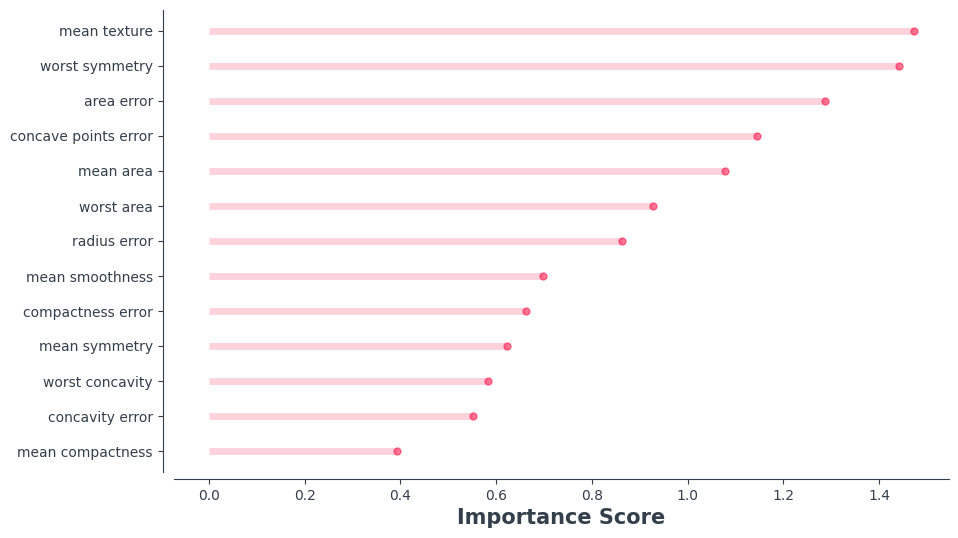

In [2]:
#Default settings
from unravel.tabular import UnRAVELTabularExplainer

#Sample to be explained
sample_idx = sample_idx[0]

#Generating initial starting point
X_init = np.array([X_test[sample_idx]])

#Initializing the explainer object
f_e = UnRAVELTabularExplainer(model, X_train, categorical_features = categorical_features, mode = mode)

explanation = f_e.explain(X_init = X_init, feature_names = features, alpha = "FUR", max_iter = 5, \
                          normalize=False, importance_method="ARD")

<StemContainer object of 3 artists>

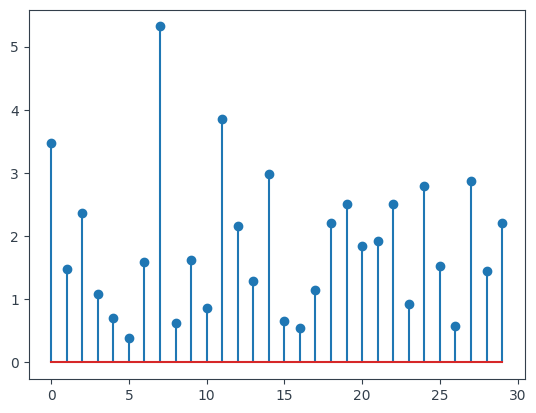

In [3]:
import matplotlib.pyplot as plt
plt.stem(explanation)

In [4]:
print(explanation)

[3.48037423 1.47221584 2.36249242 1.07805988 0.69692964 0.3927715
 1.59450257 5.31969109 0.62243806 1.62162849 0.86202389 3.85228519
 2.15339068 1.28632643 2.98993537 0.66144544 0.5515384  1.14549301
 2.20706386 2.51679826 1.84053502 1.92398349 2.50650398 0.92856421
 2.797423   1.525588   0.58220027 2.87453491 1.44103978 2.20522367]


In [5]:
print(features)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [8]:
# Generate explantion data for Random Foreall_featuresst
from project_utils.feature_stats import Feature_Statistics
from project_utils.feature_stats import Class_Feature_Statistics

UR_Stats = Feature_Statistics(feature_names = features.tolist(), mode='classification', classes=['malignant', 'benign'])

Mal_Stats = Class_Feature_Statistics('malignant', features.tolist(), classes=['malignant', 'benign'])
Ben_Stats = Class_Feature_Statistics('benign',    features.tolist(), classes=['malignant', 'benign'])

for test_instance in range(X_test.shape[0]):

    X_init = np.array([X_test[test_instance]])

    UR_explain_inst = f_e.explain(X_init = X_init, feature_names = features, alpha = "FUR", max_iter = 30, \
                          normalize=False, plot=False, importance_method="ARD")
     
    y_predict = model.predict_proba(X_init)

    print('INSTANCE: ', test_instance)
    
    UR_Stats.Add_Sample(sample     = UR_explain_inst,
                        outcome    = y_test[test_instance],
                        prediction = y_predict)
    
    Mal_Stats.Add_Sample(sample     = UR_explain_inst,
                         outcome    = y_test[test_instance],
                         prediction = y_predict)
    
    Ben_Stats.Add_Sample(sample     = UR_explain_inst,
                         outcome    = y_test[test_instance],
                         prediction = y_predict)
    
    last_instance = test_instance

INSTANCE:  0
INSTANCE:  1
INSTANCE:  2
INSTANCE:  3
INSTANCE:  4
INSTANCE:  5
INSTANCE:  6
INSTANCE:  7
INSTANCE:  8
INSTANCE:  9
INSTANCE:  10
INSTANCE:  11
INSTANCE:  12
INSTANCE:  13
INSTANCE:  14
INSTANCE:  15
INSTANCE:  16
INSTANCE:  17
INSTANCE:  18
INSTANCE:  19
INSTANCE:  20
INSTANCE:  21
INSTANCE:  22
INSTANCE:  23
INSTANCE:  24
INSTANCE:  25
INSTANCE:  26
INSTANCE:  27
INSTANCE:  28
INSTANCE:  29
INSTANCE:  30
INSTANCE:  31
INSTANCE:  32
INSTANCE:  33
INSTANCE:  34
INSTANCE:  35
INSTANCE:  36
INSTANCE:  37
INSTANCE:  38
INSTANCE:  39
INSTANCE:  40
INSTANCE:  41
INSTANCE:  42
INSTANCE:  43
INSTANCE:  44
INSTANCE:  45
INSTANCE:  46
INSTANCE:  47
INSTANCE:  48
INSTANCE:  49
INSTANCE:  50
INSTANCE:  51
INSTANCE:  52
INSTANCE:  53
INSTANCE:  54
INSTANCE:  55
INSTANCE:  56


In [9]:
UR_Stats.Feature_Counts(max_features=8, scaled=True, threshold=0.075)

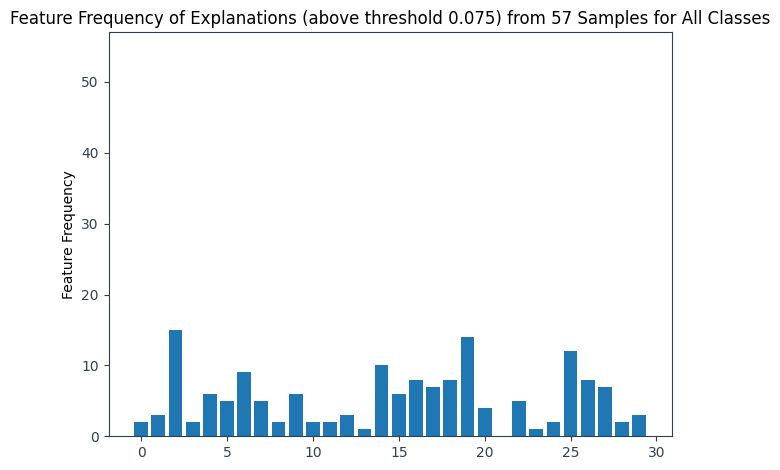

1 -      mean radius
2 -      mean texture
3 -      mean perimeter
4 -      mean area
5 -      mean smoothness
6 -      mean compactness
7 -      mean concavity
8 -      mean concave points
9 -      mean symmetry
10 -     mean fractal dimension
11 -     radius error
12 -     texture error
13 -     perimeter error
14 -     area error
15 -     smoothness error
16 -     compactness error
17 -     concavity error
18 -     concave points error
19 -     symmetry error
20 -     fractal dimension error
21 -     worst radius
22 -     worst texture
23 -     worst perimeter
24 -     worst area
25 -     worst smoothness
26 -     worst compactness
27 -     worst concavity
28 -     worst concave points
29 -     worst symmetry
30 -     worst fractal dimension


In [19]:
UR_Stats.Frequency_Plot(top_features=False, display_feature_list=True)

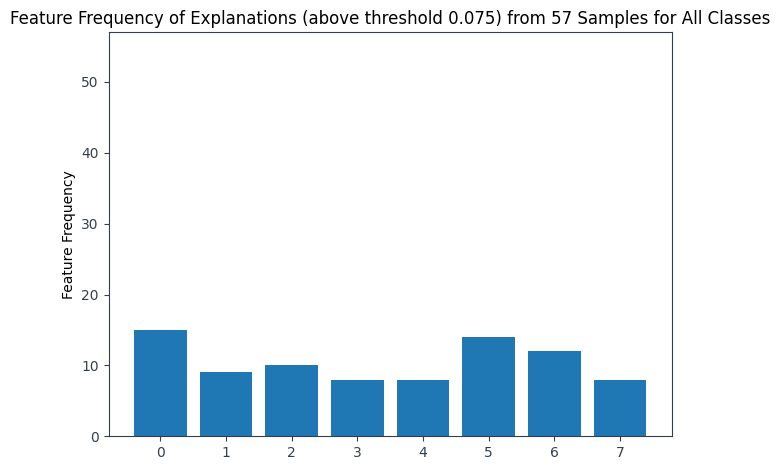

1 -      mean perimeter
2 -      mean concavity
3 -      smoothness error
4 -      concavity error
5 -      symmetry error
6 -      fractal dimension error
7 -      worst compactness
8 -      worst concavity


In [20]:
UR_Stats.Frequency_Plot(display_feature_list=True)

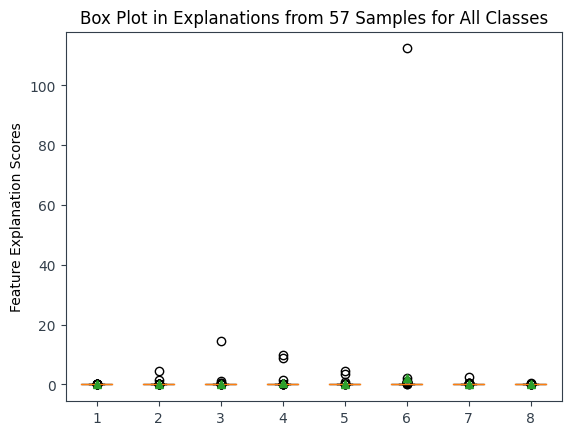

1 -      mean perimeter
2 -      mean concavity
3 -      smoothness error
4 -      concavity error
5 -      symmetry error
6 -      fractal dimension error
7 -      worst compactness
8 -      worst concavity


In [12]:
UR_Stats.Box_Plot()

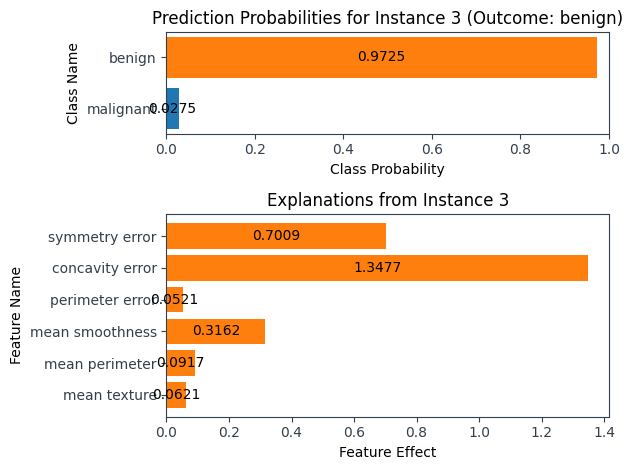

In [13]:
UR_Stats.View_Explanation(instance=3, max_features=6)

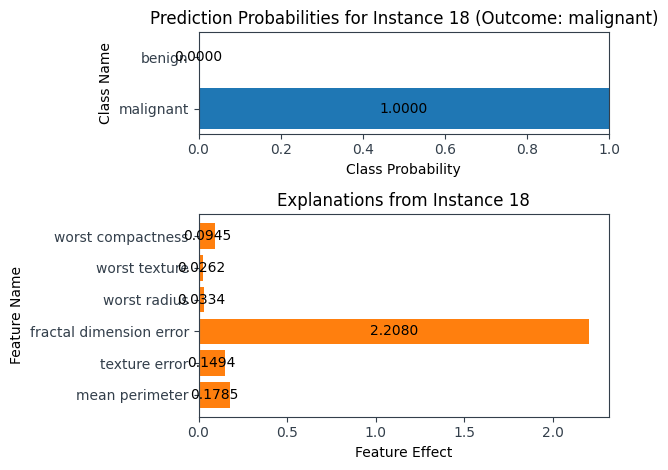

In [14]:
UR_Stats.View_Explanation(instance=18, max_features=6)

In [31]:
Mal_Stats.Feature_Counts(max_features=8, scaled=True, threshold=0.02)

In [32]:
Ben_Stats.Feature_Counts(max_features=8, scaled=True, threshold=0.02)

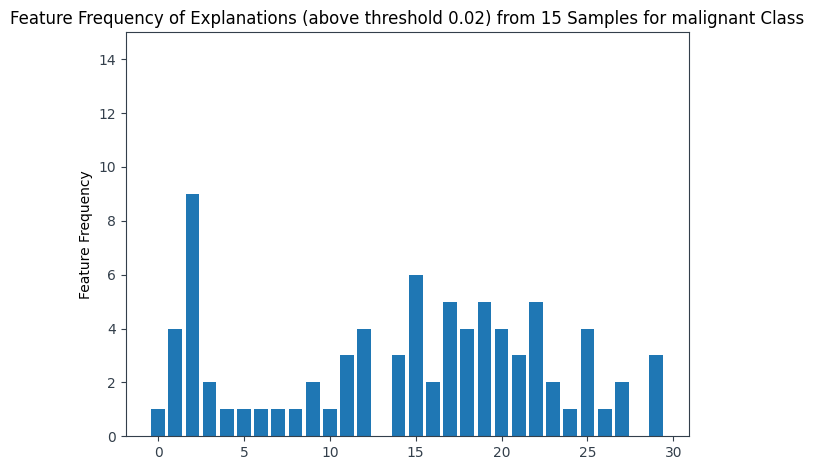

1 -      mean radius
2 -      mean texture
3 -      mean perimeter
4 -      mean area
5 -      mean smoothness
6 -      mean compactness
7 -      mean concavity
8 -      mean concave points
9 -      mean symmetry
10 -     mean fractal dimension
11 -     radius error
12 -     texture error
13 -     perimeter error
14 -     area error
15 -     smoothness error
16 -     compactness error
17 -     concavity error
18 -     concave points error
19 -     symmetry error
20 -     fractal dimension error
21 -     worst radius
22 -     worst texture
23 -     worst perimeter
24 -     worst area
25 -     worst smoothness
26 -     worst compactness
27 -     worst concavity
28 -     worst concave points
29 -     worst symmetry
30 -     worst fractal dimension


In [33]:
Mal_Stats.Frequency_Plot(top_features=False, display_feature_list=True)

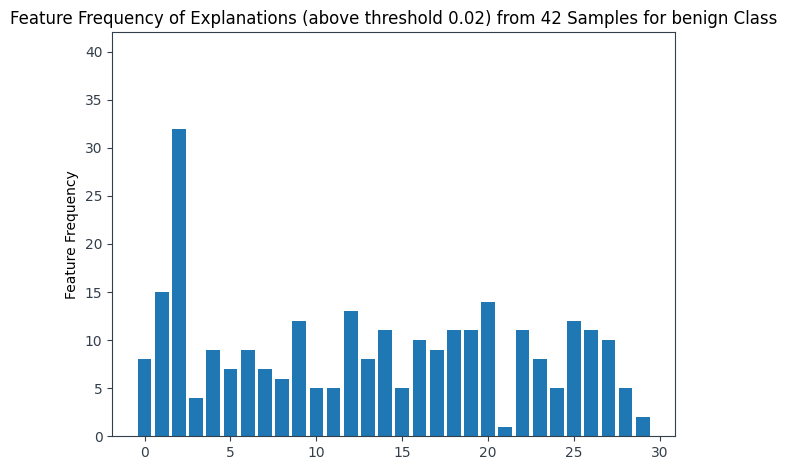

1 -      mean radius
2 -      mean texture
3 -      mean perimeter
4 -      mean area
5 -      mean smoothness
6 -      mean compactness
7 -      mean concavity
8 -      mean concave points
9 -      mean symmetry
10 -     mean fractal dimension
11 -     radius error
12 -     texture error
13 -     perimeter error
14 -     area error
15 -     smoothness error
16 -     compactness error
17 -     concavity error
18 -     concave points error
19 -     symmetry error
20 -     fractal dimension error
21 -     worst radius
22 -     worst texture
23 -     worst perimeter
24 -     worst area
25 -     worst smoothness
26 -     worst compactness
27 -     worst concavity
28 -     worst concave points
29 -     worst symmetry
30 -     worst fractal dimension


In [34]:
Ben_Stats.Frequency_Plot(top_features=False, display_feature_list=True)

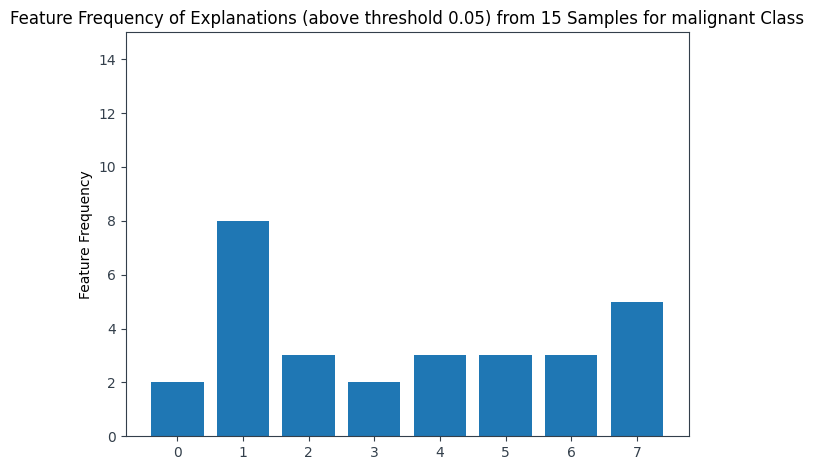

1 -      mean texture
2 -      mean perimeter
3 -      texture error
4 -      perimeter error
5 -      smoothness error
6 -      compactness error
7 -      concave points error
8 -      fractal dimension error


In [22]:
Mal_Stats.Frequency_Plot(display_feature_list=True)

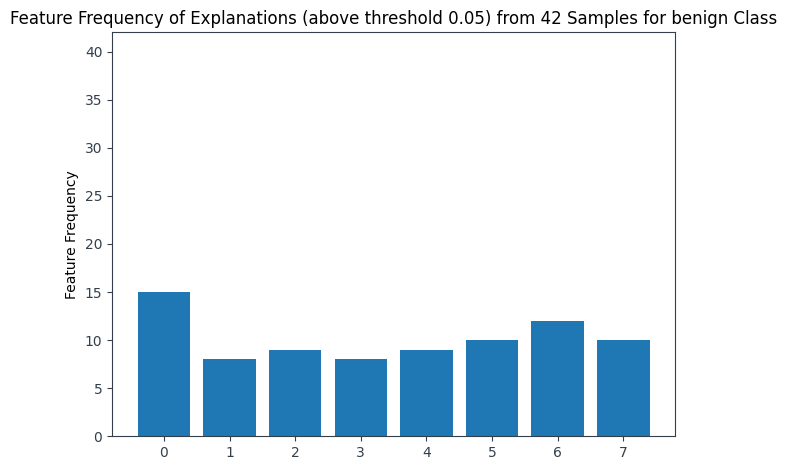

1 -      mean perimeter
2 -      mean smoothness
3 -      mean concavity
4 -      mean fractal dimension
5 -      smoothness error
6 -      fractal dimension error
7 -      worst compactness
8 -      worst concavity


In [26]:
Ben_Stats.Frequency_Plot(display_feature_list=True)

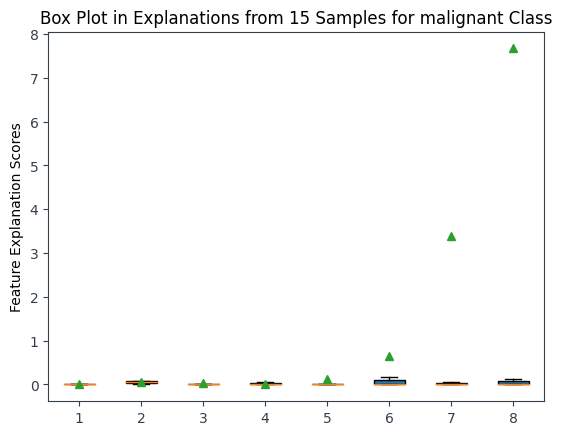

1 -      mean texture
2 -      mean perimeter
3 -      texture error
4 -      perimeter error
5 -      smoothness error
6 -      compactness error
7 -      concave points error
8 -      fractal dimension error


In [29]:
Mal_Stats.Box_Plot(showfliers=False)

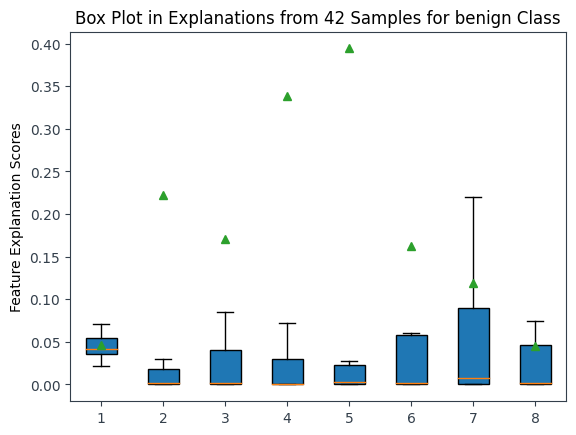

1 -      mean perimeter
2 -      mean smoothness
3 -      mean concavity
4 -      mean fractal dimension
5 -      smoothness error
6 -      fractal dimension error
7 -      worst compactness
8 -      worst concavity


In [30]:
Ben_Stats.Box_Plot(showfliers=False)